# Equivalent layer technique for estimating the magnetization direction over Montes Claros complex of GAP: Analysis of the results

Notebook for analysing real data application over Montes Claros complex of Goias Alkaline Province (GAP), center of Brazil.

## Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg 
import matplotlib.cbook as cbook

In [3]:
notebook_name = 'Montes_Claros_EQL_magdirection_analysis.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

## importing my package

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

## Loading data

In [7]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

## Loading results

In [8]:
with open('data/result_mclaros.pickle') as f:
        results = pickle.load(f)

## List of saved files

In [9]:
saved_files = []

## Survey information

In [10]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


## Main field direction

In [11]:
inc_gf,dec_gf = data['main_field']

In [12]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Coordinates of the equivalent sources

In [13]:
h = results['layer_depth']

In [14]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

## The best result obtained by L-curve

In [15]:
m_LM = results['magnetic_moment'][3]
inc_est = results['inc_est'][3]
dec_est = results['dec_est'][3]

In [16]:
mu = results['reg_parameter'][3]

In [17]:
phi = results['phi'][3]

In [18]:
print mu

100000.0


## Visualization of the convergence

In [19]:
phi = (np.array(phi)/data['x'].size)

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


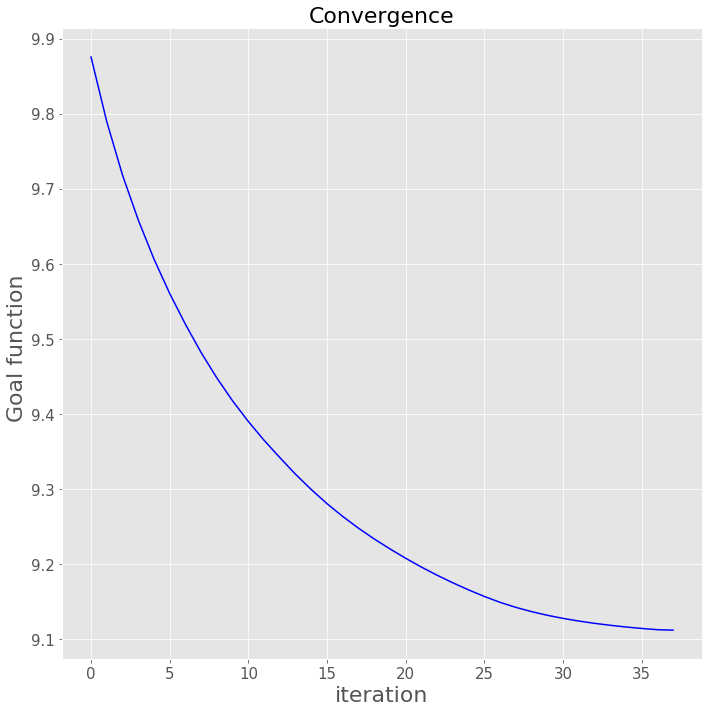

In [20]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.plot(phi,'b-',linewidth=1.5)
plt.title('Convergence', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('Goal function ', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/convergence_LM_NNLS_montesclaros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Estimated magnetization direction

In [21]:
print (inc_est,dec_est)

(-45.49198268170724, 38.37875062123968)


## Comparison between observed data and predicted data

In [22]:
pred = fc.tfa_layer(data['x'],data['y'],data['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [23]:
res = pred - data['tfa_40']

In [24]:
r_norm,r_mean,r_std = fc.residual(data['tfa_40'],pred)

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


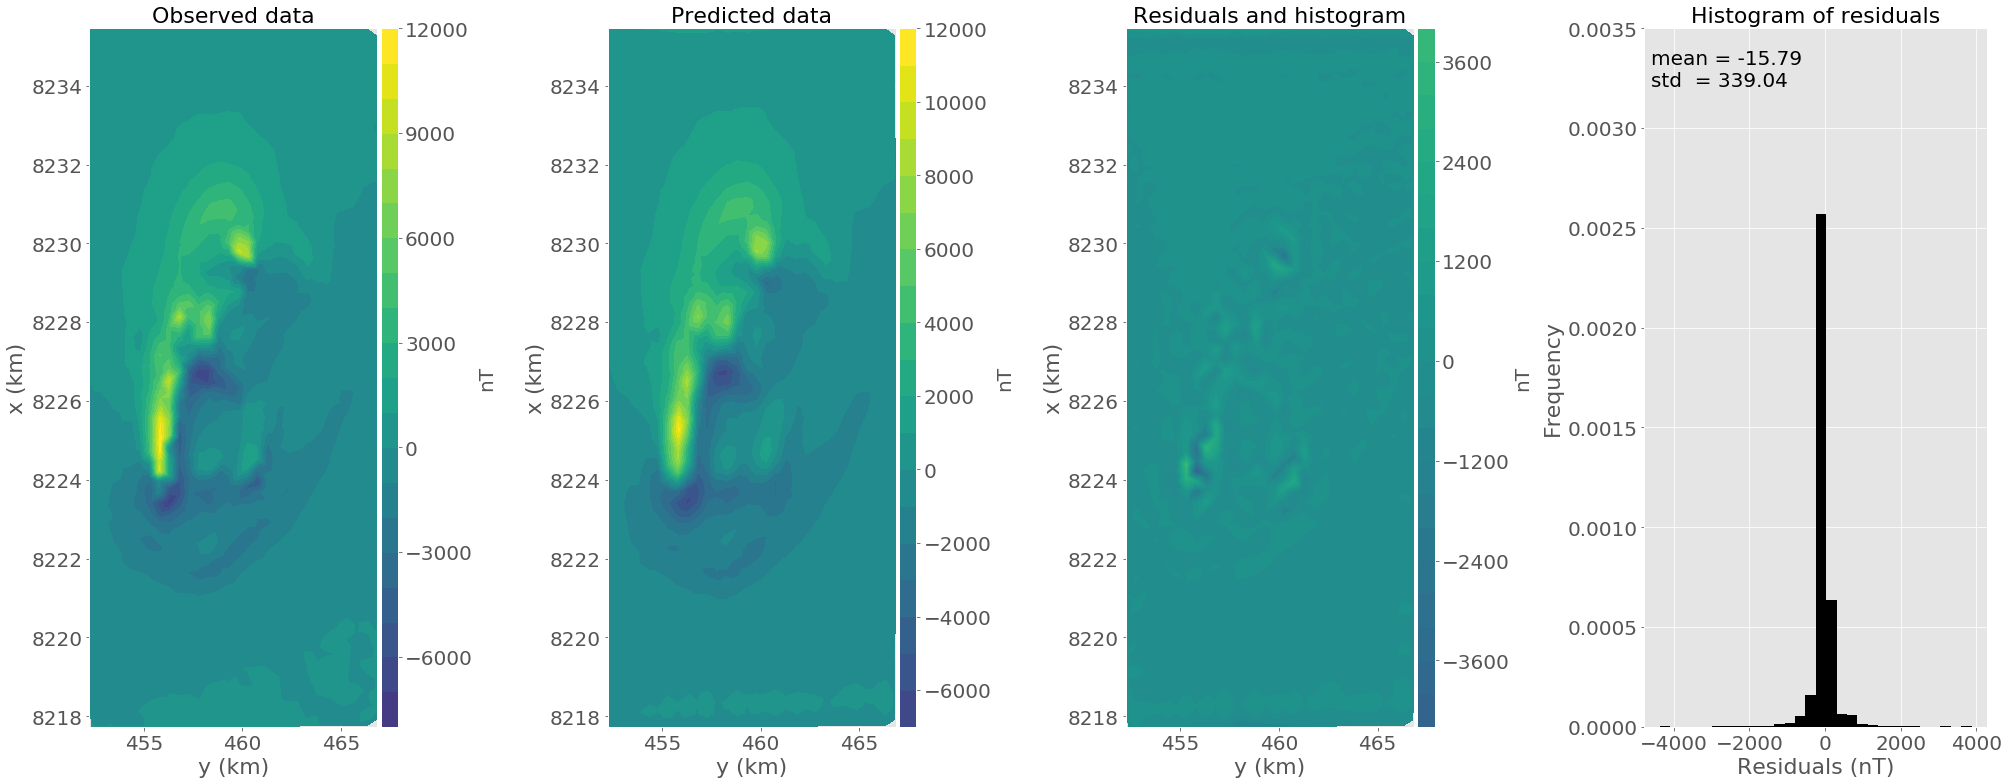

In [25]:
title_font = 22
bottom_font = 20
plt.figure(figsize=(28,11), tight_layout=True)

ranges = np.abs([data['tfa_40'].max(), 
                                   data['tfa_40'].min(),
                                   pred.max(), pred.min()]).max()
res_ranges = np.max(np.abs(res))

ax1=plt.subplot(1,4,1)
plt.title('Observed data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'],
                data['tfa_40'], 20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax2=plt.subplot(1,4,2)
plt.title('Predicted data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'],
                pred, 20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)


ax3=plt.subplot(1,4,3)
plt.title('Residuals and histogram', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'],
                res, 20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

ax4=plt.subplot(1,4,4)
plt.title('Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.text(0.02, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res), np.std(res)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=bottom_font)
n, bins, patches = plt.hist(res,bins=30, normed=True, facecolor='black')
#ax4.set_xticks([-100.0,-50.,0.0,50.,100.0])
ax4.set_yticks([.0,.00050,.0010,.0015,.0020,.0025,.003,.0035])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)


###
file_name = 'figs/data_fitting_LM_NNLS_montesclaros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Estimated magnetic moment within the layer

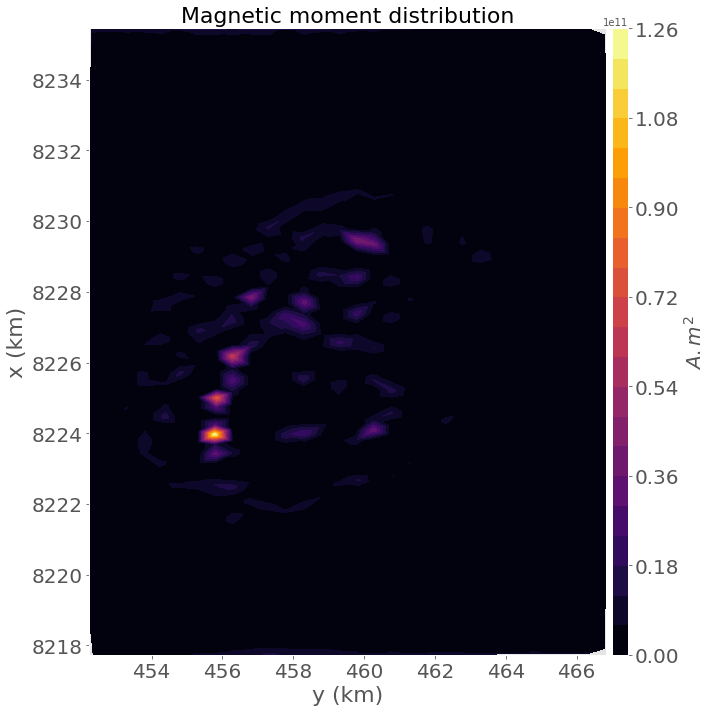

In [26]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('Magnetic moment distribution', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tricontourf(1e-3*ys,1e-3*xs,m_LM, 20, cmap='inferno')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('$A.m^2$',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

###
file_name = 'figs/magnetic_moment_positive_LM_NNLS_montesclaros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Reduction to the pole

In [27]:
G_rtp = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,90.,0.,90.,0.)

In [28]:
tfa_rtp = np.dot(G_rtp,m_LM)

### Visualization of the reduction to the pole

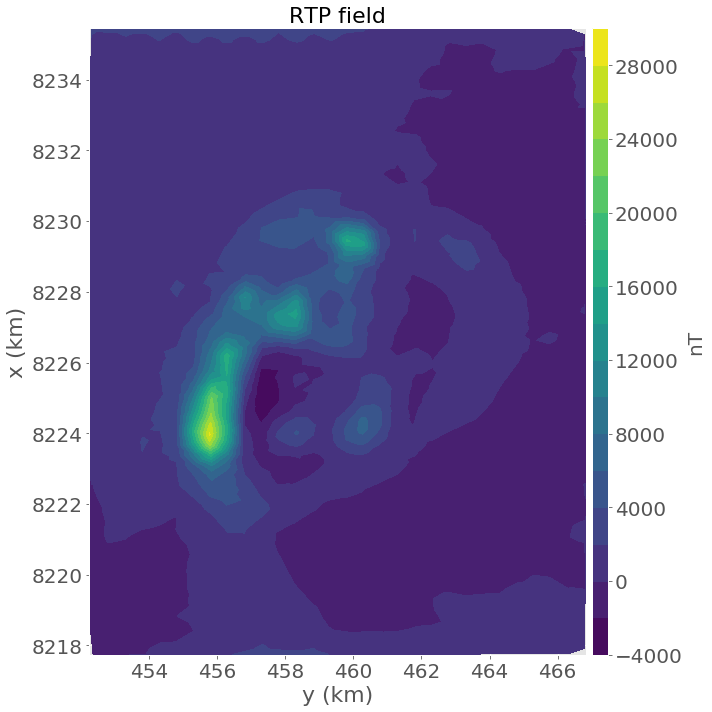

In [29]:
title_font = 22
bottom_font = 20
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.title('RTP field', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tricontourf(1e-3*data['y'],1e-3*data['x'],tfa_rtp, 20, cmap='viridis')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'figs/RTP_data_montesclaros'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Figures for paper

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:73: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


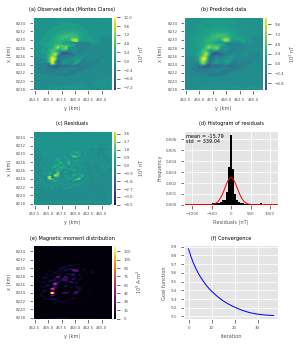

In [30]:
#title_font = 17
title_font = 5
#bottom_font = 14
bottom_font = 4
hist_font = 5

height_per_width = 17./15.
plt.figure(figsize=(4.33,4.33*height_per_width), tight_layout=True)
plt.style.use('ggplot')


ranges = np.abs([data['tfa_40'].max(),
                 data['tfa_40'].min(),
                 pred.max(), pred.min()]).max()*1e-3

ranges_r = np.abs([res.max(),res.min()]).max()*1e-3

## Observed data plot
ax1=plt.subplot(3,2,1)

plt.tricontourf(1e-3*data['y'],
                1e-3*data['x'],
                data['tfa_40']*1e-3, 30, cmap='viridis',vmin=-ranges, vmax=ranges)
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('$10^{3}$ nT',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(a) Observed data (Montes Claros)', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())

## Predicted data plot
ax2=plt.subplot(3,2,2)

plt.tricontourf(1e-3*data['y'],
                1e-3*data['x'],
                pred*1e-3, 30, cmap='viridis',vmin=-ranges, vmax=ranges)
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('$10^{3}$ nT',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(b) Predicted data', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())

## Residuals plot 
ax3=plt.subplot(3,2,3)

plt.tricontourf(1e-3*data['y'],
             1e-3*data['x'],
             res*1e-3, 30, cmap='viridis',  vmin=-ranges_r, vmax=ranges_r)
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('$10^{3}$ nT',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(c) Residuals', fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())

## Histogram
ax4= plt.subplot(3,2,4)
plt.text(0.02, 0.97, "mean = {:.2f}\nstd  = {:.2f} ".format(np.mean(res), np.std(res)),
         horizontalalignment='left',
         verticalalignment='top',
         transform = ax4.transAxes, fontsize=hist_font)
n, bins, patches = plt.hist(res,bins=160, normed=True, facecolor='black')
gauss = mlab.normpdf(bins, 0, 160)
plt.plot(bins, gauss, 'r-', linewidth=1.)
#ax4.set_xticks([-100.0,-50.,0.0,50.,100.0])
#ax4.set_yticks([.0,.010,.020,.030,.040,.05,.06])
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(d) Histogram of residuals', fontsize =title_font)
plt.xlabel('Residuals (nT)', fontsize = title_font)
plt.ylabel('Frequency', fontsize = title_font)
plt.xlim(-1200, 1200)

## Magnetic-moment distribution
ax5= plt.subplot(3,2,5)
plt.tricontourf(1e-3*ys,
                1e-3*xs, 
                m_LM*1e-9, 30, cmap='inferno')
cbar = plt.colorbar(pad=0.01, aspect=20, shrink=1.0)
cbar.set_label('$10^{9}$ A$\cdot$m$^2$',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(e) Magnetic moment distribution', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())


## Convergence graphic
ax6= plt.subplot(3,2,6)
plt.plot(phi, 'b-',linewidth=1.0)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('(f) Convergence', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('Goal function ', fontsize = title_font)

########################################################################### 
#file_name = 'figs/montes_claros_compiled_LM_NNLS_magRM'
file_name = 'figs/Fig5'
#plt.savefig(file_name+'.png',dpi=300)
plt.savefig(file_name+'.png',dpi=1200)
saved_files.append(file_name+'.png')

#plt.savefig(file_name+'.eps',dpi=300)
plt.savefig(file_name+'.eps',dpi=1200)
saved_files.append(file_name+'.eps')


plt.show()

## RTP Montes claros 

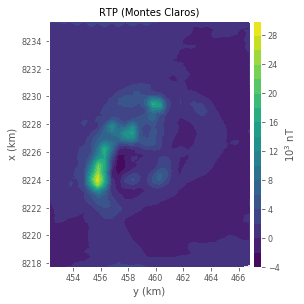

In [31]:
#title_font = 17
title_font = 10
#bottom_font = 14
bottom_font = 8

saturation_factor = 1.

height_per_width = 9./9.
plt.figure(figsize=(4.33,4.33*height_per_width), tight_layout=True)
plt.style.use('ggplot')

plt.tricontourf(1e-3*ys,
                1e-3*xs, 
                tfa_rtp*1e-3, 20, cmap='viridis')
cbar = plt.colorbar(pad=0.01, aspect=30, shrink=1.0)
cbar.set_label('$10^{3}$ nT',size=title_font)
cbar.ax.tick_params(labelsize=bottom_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
plt.title('RTP (Montes Claros)', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())

########################################################################### 
#file_name = 'figs/RTP_data_montes_claros'
file_name = 'figs/Fig6'
#plt.savefig(file_name+'.png',dpi=400)
plt.savefig(file_name+'.png',dpi=1200)
saved_files.append(file_name+'.png')

#plt.savefig(file_name+'.eps',dpi=400)
plt.savefig(file_name+'.eps',dpi=1200)
saved_files.append(file_name+'.eps')

plt.show()

## Figure for repository

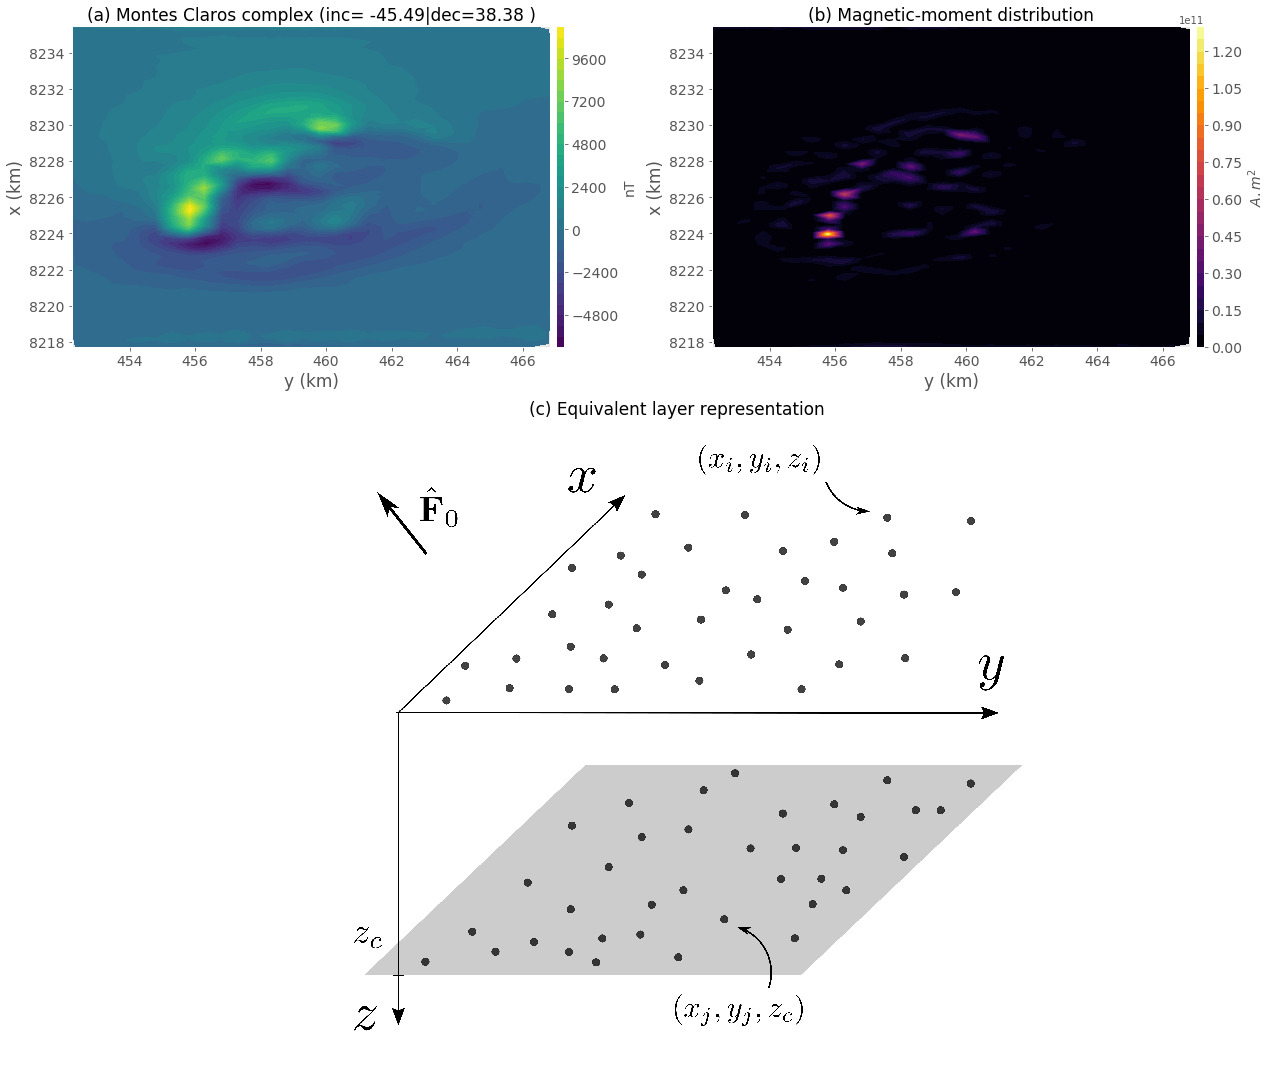

In [32]:
title_font = 17
bottom_font = 14
plt.style.use('ggplot')


fig = plt.figure(figsize=(18,15), tight_layout=True)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 2])

## Predicted data
ax0 = fig.add_subplot(gs[0, 0])
plt.title('(a) Montes Claros complex (inc= %.2f|dec=%.2f )'% (inc_est,dec_est), fontsize=title_font)
plt.xlabel('y (km)',fontsize = title_font)
plt.ylabel('x (km)',fontsize = title_font)
plt.tricontourf(1e-3*data['y'],1e-3*data['x'], pred, 30, cmap='viridis')
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('nT',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

## Magnetic-moment distribution
ax1 = fig.add_subplot(gs[0, 1])
plt.title('(b) Magnetic-moment distribution', fontsize=title_font)
plt.xlabel('y (km)', fontsize = title_font)
plt.ylabel('x (km)', fontsize = title_font)
plt.xlim(1e-3*data['y'].min(),1e-3*data['y'].max())
plt.ylim(1e-3*data['x'].min(),1e-3*data['x'].max())
plt.tricontourf(1e-3*ys,1e-3*xs,m_LM, 30, cmap='inferno')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.set_label('$A.m^2$',size=bottom_font)
cb.ax.tick_params(labelsize=bottom_font)

## Equivalent layer image
ax2 = fig.add_subplot(gs[1:, :],)
ax2.set_title('(c) Equivalent layer representation',fontsize=title_font)
ax2.set_xticks([])
ax2.set_yticks([])
image = plt.imread('figs/eqlayer_figure.png')
ax2.imshow(image)

########################################################################### 
file_name = 'figs/eqlayer_magdir_repository'
plt.savefig(file_name+'.png',dpi=700)
saved_files.append(file_name+'.png')

plt.show()